# Python Linear Algebra_Part 4: Linear Programming
## Full Day Workshop for user learn Data Science with Python
## 2018 Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose`

# Introduction

## Why Called Programming?
- In the early days of computing, computers were primarily used to
solve optimization problems, 
- so the term “programming” is often used
to describe optimization problems. Linear programming is the study
of **linear optimization problems that involve linear constraints** 

- These
types of optimization problems play an important role in business: 
- the
whole point of corporations is to constantly optimize profits subject
to time, energy, and legal constraints

## Linear Programming

- Linear programming deals with the maximization (or minimization) of a linear objective function, 
- subject to linear constraints, where all the decision variables are continuous. 
- That is, no discrete variables are allowed. The linear objective and constraints must consist of linear expressions.

## Linear Expression
- A linear expression is a scalar product, for example, the expression:

$$∑a^ix^i$$

 
where $a^i$ represents constants (that is, data) and $x^i$ represents variables or unknowns.

Such an expression can also be written in short form as a vector product:

$$^tAX$$
 
where  AA  is the vector of constants and  XX  is the vector of variables.

#### Note: Nonlinear terms that involve variables (such as x and y) are not allowed in linear expressions. 
#### Terms that are not allowed in linear expressions include

- multiplication of two or more variables (such as x times y),
- quadratic and higher order terms (such as x squared or x cubed),
- exponents,
- logarithms,
- absolute value


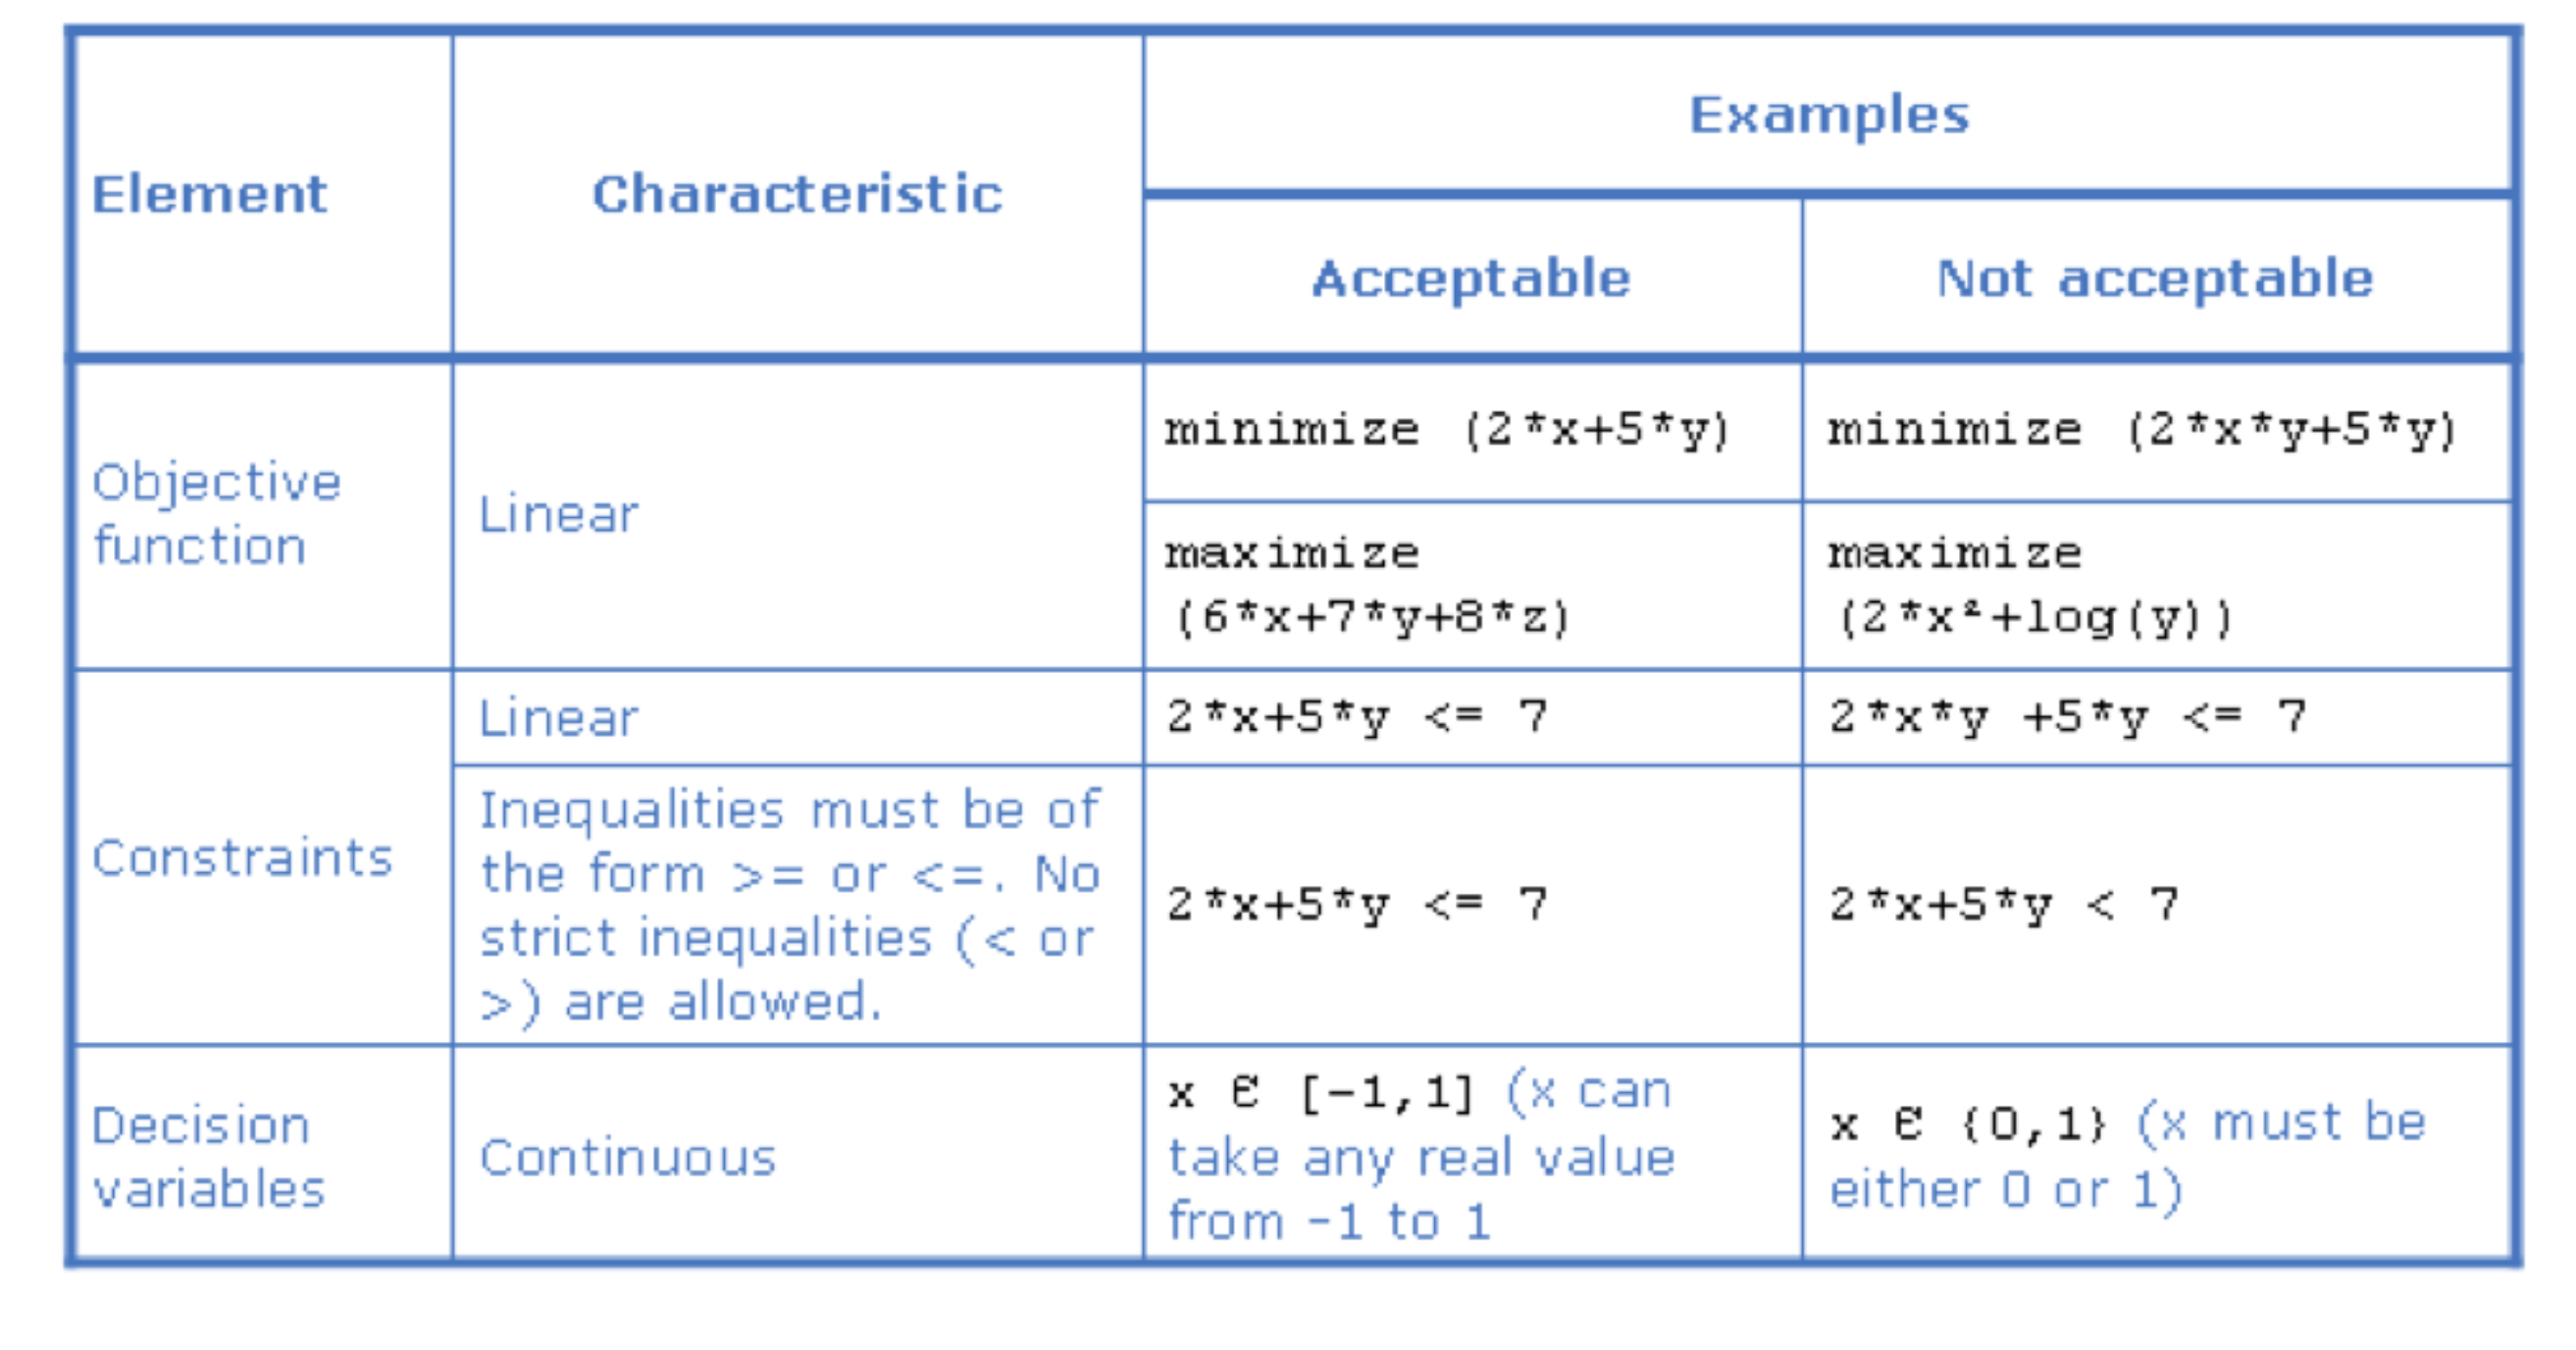

#### The feasible region for the linear programming problem. The feasible region is the subset of the xy-plane that contains points (x, y) satisfying all the constraints
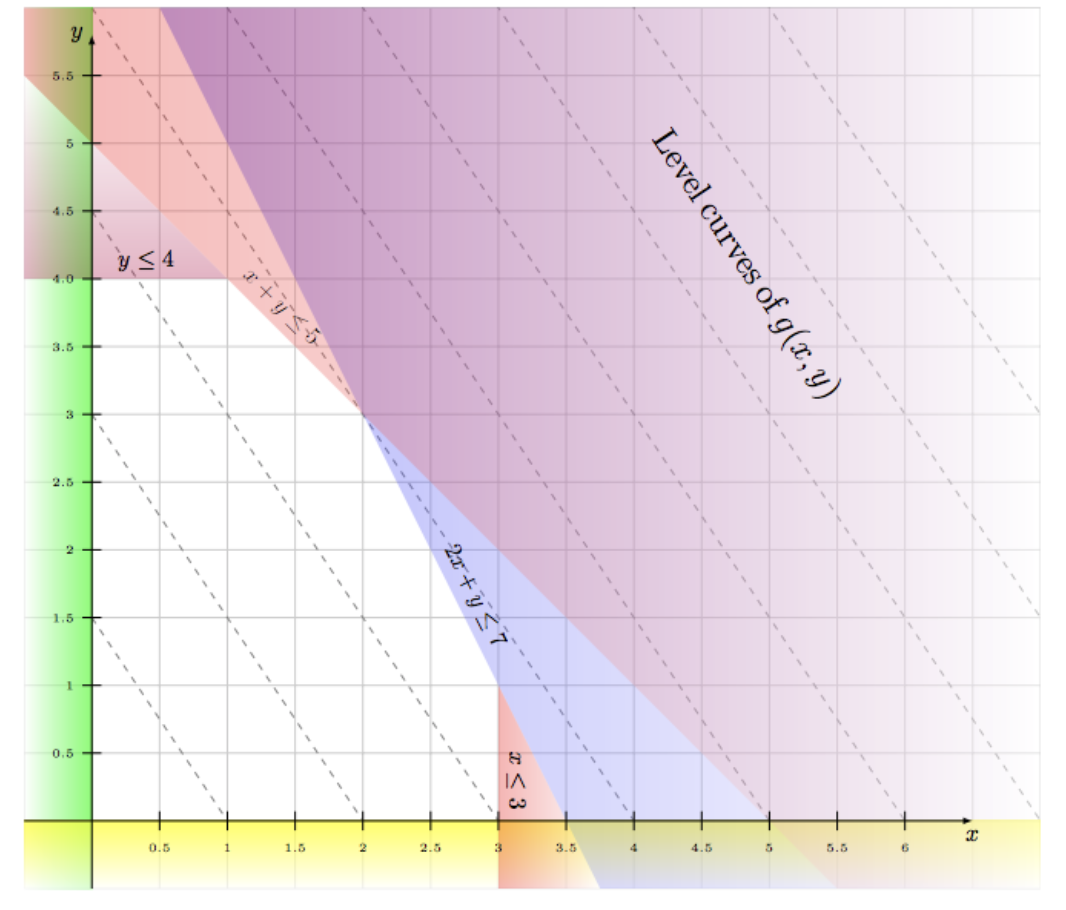

# Simplex Algorithm
- The simplex algorithm, invented in 1947, is a systematic procedure for finding optimal
solutions to linear programming problems. 
- The main idea of the simplex algorithm is
to start from one of the corner points of the feasible region and “move” along the sides
of the feasible region until we find the maximum. 
- The reason why this “sticking to
the sides” strategy works is that maximum solutions to linear programming problems
always occur at the corners of the feasible region

# Introduction to PuLP
- PuLP is an open source linear programming package for python. PuLP can be installed using pip, instructions here.
- A brief reminder of our linear programming problem:
- We want to find the maximum solution to the objective function:

$Z = 4x + 3y$

- Subject to the following constraints:

$x ≥ 0$

$y ≥ 2$

$2y ≤ 25 - x$

$4y ≥ 2x - 8$

$y ≤ 2x - 5$

In [1]:
!pip install 'PuLP'

    100% |████████████████████████████████| 13.5MB 81kB/s  eta 0:00:01
  Running setup.py bdist_wheel for PuLP ... done
  Stored in directory: /gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.cache/pip/wheels/d0/73/a3/85621bee86fa3dc23ddc3e0b19d8dcf58e3bc232ccd05793ed
Successfully built PuLP


In [4]:
import pulp

In [6]:
help(pulp)

Help on package pulp:

NAME
    pulp

FILE
    /gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/pulp/__init__.py

DESCRIPTION
    PuLP is an LP modeler written in python. PuLP can generate MPS or LP files
    and call GLPK[1], COIN CLP/CBC[2], CPLEX[3], and GUROBI[4] to solve linear
    problems.
    
    See the examples directory for examples.
    
    PuLP requires Python >= 2.5.
    
    The examples require at least a solver in your PATH or a shared library file.
    
    Documentation is found on https://www.coin-or.org/PuLP/.
    A comprehensive wiki can be found at https://www.coin-or.org/PuLP/
    
    Use LpVariable() to create new variables. To create a variable 0 <= x <= 3
    >>> x = LpVariable("x", 0, 3)
    
    To create a variable 0 <= y <= 1
    >>> y = LpVariable("y", 0, 1)
    
    Use LpProblem() to create new problems. Create "myProblem"
    >>> prob = LpProblem("myProblem", LpMinimize)
    
    Combine variables to create expres

### Step 1: Define Problem
#### Firstly Instantiate a problem class, we'll name it "First LP problem" and we're looking for an optimal maximum so we use LpMaximize

In [8]:
first_lp_problem = pulp.LpProblem('First LP Problem', pulp.LpMaximize)

### Step 2: Define Decision Variables
#### Model our decision variables using the LpVariable class. In our example, x had a lower bound of 0 and y had a lower bound of 2.
#### Upper bounds can be assigned using the upBound parameter.

In [10]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

### Step 3: Define Objective Function
#### Object Functions and Constraint are added using the $+=$ operator to the model.
#### Function first, follow by Individual Constraints 

In [19]:
# Objective Function
first_lp_problem += 4 * x + 3 * y, "Z"

# Constraint
first_lp_problem += 2 * y <= 25 - x
first_lp_problem += 4 * y >= 2 * x - 8
first_lp_problem += y <= 2 * x - 5

 
 ### Step 4: Review Problem

In [20]:
first_lp_problem

First LP Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

_C4: x + 2 y <= 25

_C5: - 2 x + 4 y >= -8

_C6: - 2 x + y <= -5

_C7: x + 2 y <= 25

_C8: - 2 x + 4 y >= -8

_C9: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

### Step 5: Solver
- PuLP supports open source linear programming solvers such as CBC and GLPK, as well as commercial solvers such as Gurobi and IBM's CPLEX
- The default solver is CBC, which comes packaged with PuLP upon installation.
- For most applications, the open source CBC from COIN-OR will be enough for most simple linear programming optimisation algorithms.
- More details regarding COIN-OR or other packages: https://en.wikipedia.org/wiki/COIN-OR

In [21]:
first_lp_problem.solve()
pulp.LpStatus[first_lp_problem.status]

'Optimal'

### Solver Status Code:
- **Not Solved**: Status prior to solving the problem.
- **Optimal**: An optimal solution has been found.
- **Infeasible**: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
- **Unbounded**: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
- **Undefined**: The optimal solution may exist but may not have been found

### Step 6: Result
- Use the varValue method to retrieve the values of our variable x and y. And the pulp.value function to view the maximum value of the objective function


In [22]:
for variable in first_lp_problem.variables():
    print "{} = {}".format(variable.name,variable.varValue)

x = 14.5
y = 5.25


In [23]:
print 
pulp.value(first_lp_problem.objective)

73.75

# Application I: Maximizing Profit with Car Resource Problem
## Background

- A boutique car manufacturer, producing luxury cars running on one month (30 days) cycles

- There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

- The 2 cars need different time with each resource:

- Robot time: Car A - 3 days; Car B - 4 days.

- Engineer time: Car A - 5 days; Car B - 6 days.

- Detailer time: Car A - 1.5 days; Car B - 3 days.

- Car A provides €30,000 profit, whilst Car B offers €45,000 profit.

- At the moment, they produce 4 of each cars per month, for €300,000 profit. 

This can be modelled as follows:

#### Maximise

$Profit = 30,000A + 45,000B$

#### Subject to:

$A ≥ 0$

$B ≥ 0$

$3A + 4B ≤ 30$

$5A + 6B ≤ 60$

$1.5A + 3B ≤ 21$



In [24]:
# Step 1: Instantiate problem class
model = pulp.LpProblem('Profit Max', pulp.LpMaximize)
                       

In [25]:
# Step 2: Decision Variable
A = pulp.LpVariable("A", lowBound=0, cat='Integer')
B = pulp.LpVariable("B", lowBound=0, cat='Integer')

In [27]:
# Step 3: Objective Function & Constraint
# Function
model += 30000 * A + 45000 * B, "Profit"

# Constraint
model += 3 * A + 4 * B <= 30
model += 5 * A + 6 * B <= 60
model += 1.5 * A + 3 * B <= 21



In [29]:
# Step 4: Solver
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [32]:
# Step 5: Print Result
print A.varValue

# Print our decision variable values
print "Production of Car A = {}".format(A.varValue)
print "Production of Car B = {}".format(B.varValue)


2.0
Production of Car A = 2.0
Production of Car B = 6.0


In [33]:
# Print our objective function value
print pulp.value(model.objective)

330000.0


We take our consultancy fee and leave the company with €360,000 extra profit for the factory every year.

In the next part, we'll be making some sausage

# Application II: Minimizing Cost with Sausage Blending Problem
## Background

Here is the sausage table with ingredients available to us:

| Ingredient | Cost (€/kg)  | Availability (kg) |
|------------|--------------|-------------------|
|  Pork      | 4.32         | 30                |
|  Wheat     | 2.46         | 20                |
|  Starch    | 1.86         | 17                |

We'll make 2 types of sausage:
* Economy (>40% Pork)
* Premium (>60% Pork)

- One sausage is 50 grams (0.05 kg)

- According to government regulations, the most starch we can use in our sausages is 25%

- We have a contract with a butcher, and have already purchased 23 kg pork, that will go bad if it's not used.

- We have a demand for 350 economy sausages and 500 premium sausages.

- We need to figure out how to most cost effectively blend our sausages.

#### Let's model our problem

  *p<sub>e</sub>* = Pork in the economy sausages (kg)  
  *w<sub>e</sub>* = Wheat in the economy sausages (kg)  
  *s<sub>e</sub>* = Starch in the economy sausages (kg)  
  *p<sub>p</sub>* = Pork in the premium sausages (kg)  
  *w<sub>p</sub>* = Wheat in the premium sausages (kg)  
  *s<sub>p</sub>* = Starch in the premium sausages (kg)  

#### We want to minimise costs such that:

Cost = 0.72(*p<sub>e</sub>* + *p<sub>p</sub>*) + 0.41(*w<sub>e</sub>* + *w<sub>p</sub>*) + 0.31(*s<sub>e</sub>* + *s<sub>p</sub>*)


#### With the following constraints:

  *p<sub>e</sub>* + *w<sub>e</sub>* + *s<sub>e</sub>* = 350 \* 0.05  
  *p<sub>p</sub>* + *w<sub>p</sub>* + *s<sub>p</sub>* = 500 \* 0.05  
  *p<sub>e</sub>* ≥ 0.4(*p<sub>e</sub>* + *w<sub>e</sub>* + *s<sub>e</sub>*)  
  *p<sub>p</sub>* ≥ 0.6(*p<sub>p</sub>* + *w<sub>p</sub>* + *s<sub>p</sub>*)  
  *s<sub>e</sub>* ≤ 0.25(*p<sub>e</sub>* + *w<sub>e</sub>* + *s<sub>e</sub>*)  
  *s<sub>p</sub>* ≤ 0.25(*p<sub>p</sub>* + *w<sub>p</sub>* + *s<sub>p</sub>*)  
  *p<sub>e</sub>* + *p<sub>p</sub>* ≤ 30  
  *w<sub>e</sub>* + *w<sub>p</sub>* ≤ 20  
  *s<sub>e</sub>* + *s<sub>p</sub>* ≤ 17  
  *p<sub>e</sub>* + *p<sub>p</sub>* ≥ 23

In [35]:
# Step 1: Instantiate our problem class
model = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

#### Here we have 6 decision variables, we could name them individually but this wouldn't scale up if we had hundreds/thousands of variables
#### We'll create a couple of lists from which we can create tuple indices

In [37]:
# Step 2: Construct our decision variable lists
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

#### Each of these decision variables will have similar characteristics (lower bound of 0, continuous variables). Therefore we can use PuLP's LpVariable object's dict functionality, we can provide our tuple indices.

#### These tuples will be keys for the ing_weight dict of decision variables

In [39]:
# Step 3: Decision Variable
ing_weight = pulp.LpVariable.dicts("weight kg",
                                     ((i, j) for i in sausage_types for j in ingredients),
                                     lowBound=0,
                                     cat='Continuous')

#### PuLP provides an lpSum vector calculation for the sum of a list of linear expressions.

#### Whilst we only have 6 decision variables, I will demonstrate how the problem would be constructed in a way that could be scaled up to many variables using list comprehensions.

In [41]:
# Step 4: Objective Function
model += (
    pulp.lpSum([
        4.32 * ing_weight[(i, 'pork')]
        + 2.46 * ing_weight[(i, 'wheat')]
        + 1.86 * ing_weight[(i, 'starch')]
        for i in sausage_types])
)

In [42]:
# Step 5: Constraints
# 350 economy and 500 premium sausages at 0.05 kg
model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

# Economy has >= 40% pork, premium >= 60% pork
model += ing_weight['economy', 'pork'] >= (
    0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'pork'] >= (
    0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 25% starch
model += ing_weight['economy', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# We have at most 30 kg of pork, 20 kg of wheat and 17 kg of starch available
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

# We have at least 23 kg of pork to use up
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23

In [43]:
# Step 6: Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [46]:
# Step 7: Result
for var in ing_weight:
    var_value = ing_weight[var].varValue
    print "The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value)
    
total_cost = pulp.value(model.objective)

print "The total cost is €{} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2))

The weight of starch in premium sausages is 6.25 kg
The weight of starch in economy sausages is 4.375 kg
The weight of wheat in economy sausages is 6.125 kg
The weight of wheat in premium sausages is 2.75 kg
The weight of pork in economy sausages is 7.0 kg
The weight of pork in premium sausages is 16.0 kg
The total cost is €140.96 for 350 economy sausages and 500 premium sausages


# Application III: Minimizing Production Cost with Scheduling Problem
## Background

- We have 2 offshore production plants in 2 locations and an estimated demand for our products.

- We want to produce a schedule of production from both plants that meets our demand with the lowest cost.

- A factory can be in 2 states:

- Off - Producing zero units
- On - Producing between its minimum and maximum production capacities
- Both factories have fixed costs, that are incurred as long as the factory is on
- As well as variable costs, a cost per unit of production. These vary month by month.

- We also know that factory B is down for maintenance in month 5.

## Step 0: Import Factory Variable & Monthly Demand in Panda Dataframe

In [50]:
# The code was removed by DSX for sharing.

Max_Capacity  Min_Capacity  Variable_Costs  Fixed_Costs
Month Factory                                                         
1     A              100000         20000              10          500
      B               50000         20000               5          600
2     A              110000         20000              11          500
      B               55000         20000               4          600
3     A              120000         20000              12          500

In [51]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='monthly_demand.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

demand = pd.read_csv(body, index_col=['Month'])
demand.head()



,Demand
Month,
1,120000
2,100000
3,130000
4,130000
5,140000


## Step 1: Decision Variable
### Factory Production Variables
- As we have fixed costs and variable costs, we'll need to model both production and the status of the factory i.e. whether it is on or off.

- Production is modelled as an integer variable.

- We have a value for production for each month for each factory, this is given by the tuples of our multi-index pandas DataFrame index.

### Factory Status Variables
- Factory status is modelled as a binary variable. It will have a value of 1 if the factory is on and a value of 0 when the factory is off.

- Binary variables are the same as integer variables but constrained to be >= 0 and <=1

- Again this has a value for each month for each factory, again given by the index of our DataFrame

In [53]:
production = pulp.LpVariable.dicts("production",
                                     ((month, factory) for month, factory in factories.index),
                                     lowBound=0,
                                     cat='Integer')

factory_status = pulp.LpVariable.dicts("factory_status",
                                     ((month, factory) for month, factory in factories.index),
                                     cat='Binary')

# Step 2: Problem & Objective Function
#### In our objective function we include our 2 costs:

- Our variable costs is the product of the variable costs per unit and production
- Our fixed costs is the factory status - 1 (on) or 0 (off) - multiplied by the fixed cost of production

In [55]:
model = pulp.LpProblem("Cost minimising scheduling problem", pulp.LpMinimize)

model += pulp.lpSum(
    [production[month, factory] * factories.loc[(month, factory), 'Variable_Costs'] for month, factory in factories.index]
    + [factory_status[month, factory] * factories.loc[(month, factory), 'Fixed_Costs'] for month, factory in factories.index]
)



In [56]:
# Production in any month must be equal to demand
months = demand.index
for month in months:
    model += production[(month, 'A')] + production[(month, 'B')] == demand.loc[month, 'Demand']


# Step 3: Constraint
- An issue we run into here is that in linear programming we can't use conditional constraints.

- For example we can't add to our model that if the factory is off factory status must be 0, and if it is on factory status must be 1. 
- Before we've solved our model though, we don't know if the factory will be on or off in a given month.

- In this case construct constraints that have minimum and maximum capacities that are constant variables, which we multiply by the factory status.

### Now, either factory status is 0 and:

$min_production >= 0$
$max_production <= 0$

### Or factory status is 1 and:

$min_production >= min_capacity$
$max_production <= max_capacity$


(In some cases we can use linear constraints to model conditional statements)

In [57]:
# Production in any month must be between minimum and maximum capacity, or zero.
for month, factory in factories.index:
    min_production = factories.loc[(month, factory), 'Min_Capacity']
    max_production = factories.loc[(month, factory), 'Max_Capacity']
    model += production[(month, factory)] >= min_production * factory_status[month, factory]
    model += production[(month, factory)] <= max_production * factory_status[month, factory]

In [58]:
# Factory B is off in May
model += factory_status[5, 'B'] == 0
model += production[5, 'B'] == 0

# Step 4: Solve Problem & Output DF


In [59]:
model.solve()
pulp.LpStatus[model.status]

output = []
for month, factory in production:
    var_output = {
        'Month': month,
        'Factory': factory,
        'Production': production[(month, factory)].varValue,
        'Factory Status': factory_status[(month, factory)].varValue
    }
    output.append(var_output)
output_df = pd.DataFrame.from_records(output).sort_values(['Month', 'Factory'])
output_df.set_index(['Month', 'Factory'], inplace=True)
output_df

Factory Status  Production
Month Factory                            
1     A                   1.0     70000.0
      B                   1.0     50000.0
2     A                   1.0     45000.0
      B                   1.0     55000.0
3     A                   1.0     70000.0
      B                   1.0     60000.0
4     A                   1.0     30000.0
      B                   1.0    100000.0
5     A                   1.0    140000.0
      B                   0.0         0.0
6     A                   1.0     60000.0
      B                   1.0     70000.0
7     A                   1.0     90000.0
      B                   1.0     60000.0
8     A                   1.0     70000.0
      B                   1.0    100000.0
9     A                   1.0    100000.0
      B                   1.0    100000.0
10    A                   1.0    190000.0
      B                   0.0         0.0
11    A                   1.0     80000.0
      B                   1.0     60000.0
12    A                   1.0    100000.0
      B                   0.0         0.0

In [60]:
# Print our objective function value (Total Costs)
print pulp.value(model.objective)

12906400.0


# Application III EXTENDED: Minimizing Production Cost with Scheduling Problem

We will explore not only conditional statements using binary constraints, but combining them with logical operators, 'and' and 'or'.

#### Conditional statement
To start simply, if we have the binary constraint x<sub>1</sub> and we want:

```python
if x1 == 1:
    y1 == 1
elif x1 == 0:
    y1 == 0
```

We can achieve this easily using the following constraint:
```python
y1 == x1
```

However, if we wanted the opposite:  

```python
if x1 == 1:
    y1 == 0
elif x1 == 0:
    y1 == 1
```

Given that they most both be 1 or 0, we just need the following constraint:
```python
x1 + y1 == 1
```

#### Logical 'AND' operator

Now for something a little more complex, we can coerce a particular binary constraint to be 1 based on the states of 2 other binary constraints.

If we have binary constraints x<sub>1</sub> and x<sub>2</sub> and we want to achieve the following:

```python
if x1 == 1 and x2 == 0:
    y1 == 1
else:
    y1 == 0
```

So that $y_1$ is only 1 in the case that x<sub>1</sub> is 1 and x<sub>2</sub> is 0. We can use the following 3 constraints to achieve this:

```python
[
y1 >= x1 - x2,
y1 <= x1,
y1 <= (1 - x2)
]
```

We'll take a moment to deconstruct this. In our preferred case that x<sub>1</sub> = 1 and x<sub>2</sub> = 0, the three statments resolve to:
* y<sub>1</sub> ≥ 1
* y<sub>1</sub> ≤ 1
* y<sub>1</sub> ≤ 1

The only value of $y_1$ that fulfils each of these is 1.

In any other case, however, y<sub>1</sub> will be zero. Let's take another example, say x<sub>1</sub> = 0 and x<sub>2</sub> = 1. This resolves to:
* y<sub>1</sub> ≥ -1
* y<sub>1</sub> ≤ 0
* y<sub>1</sub> ≤ 0

Given that y<sub>1</sub> is a binary variable and must be 0 or 1, the only value of y<sub>1</sub> that can fulfil each of these is 0.

You can construct 3 constraints so that y<sub>1</sub> is equal to 1, only in the case you're interested in out of the 4 following options:
* x<sub>1</sub> = 1 and x<sub>2</sub> = 1 
* x<sub>1</sub> = 1 and x<sub>2</sub> = 0 
* x<sub>1</sub> = 0 and x<sub>2</sub> = 1 
* x<sub>1</sub> = 0 and x<sub>2</sub> = 0 


In [64]:
def make_io_and_constraint(y1, x1, x2, target_x1, target_x2):
    """
    Returns a list of constraints for a linear programming model
    that will constrain y1 to 1 when
    x1 = target_x1 and x2 = target_x2; 
    where target_x1 and target_x2 are 1 or 0
    """
    binary = [0,1]
    assert target_x1 in binary
    assert target_x2 in binary
    
    if IOx1 == 1 and IOx2 == 1:
        return [
            y1 >= x1 + x2 - 1,
            y1 <= x1,
            y1 <= x2
        ]
    elif IOx1 == 1 and IOx2 == 0:
        return [
            y1 >= x1 - x2,
            y1 <= x1,
            y1 <= (1 - x2)
        ]
    elif IOx1 == 0 and IOx2 == 1:
        return [
            y1 >= x2 - x1,
            y1 <= (1 - x1),
            y1 <= x2
        ]
    else:
        return [
            y1 >= - (x1 + x2 -1),
            y1 <= (1 - x1),
            y1 <= (1 - x2)
        ]


#### Logical 'OR' operator

This is all well and good for the 'and' logical operator. What about the 'or' logical operator.

If we would like the following:
```python
if x1 == 1 or x2 == 1:
    y1 == 1
else:
    y1 == 0
```

We can use the following linear constraints:
```python
y1 <= x1 + x2
y1 * 2 >= x1 + x2
```

So that:
* if x<sub>1</sub> is 1 and x<sub>2</sub> is 1:
  * y<sub>1</sub> ≤ 2
  * 2y<sub>1</sub> ≥ 2
  * y<sub>1</sub> must equal 1
* if x<sub>1</sub> is 1 and x<sub>2</sub> is 0:
  * y<sub>1</sub> ≤ 1
  * 2y<sub>1</sub> ≥ 1
  * y<sub>1</sub> must equal 1
* if x<sub>1</sub> is 0 and x<sub>2</sub> is 1:
  * y<sub>1</sub> ≤ 1
  * 2y<sub>1</sub> ≥ 1
  * y<sub>1</sub> must equal 1
* if x<sub>1</sub> is 0 and x<sub>2</sub> is 0:
  * y<sub>1</sub> ≤ 0
  * 2y<sub>1</sub> ≥ 0
  * y<sub>1</sub> must equal 0
  

Again, we'll consider the alternative option:
```python
if x1 == 0 or x2 == 0:
    y1 == 1
else:
    y1 == 0
```

We can use the following linear constraints:
```python
y1 * 2 <= 2 - (x1 + x2)
y1 >= 1 - (x1 + x2)
```


# Back to previous example with Start-Up Cost
Both factories had 2 costs:
* Fixed Costs - Costs incurred while the factory is running
* Variable Costs - Cost per unit of production

We're going to introduce a third cost - Start up cost.

This will be a cost incurred by turning on the machines at one of the factories.

In this example, our start-up costs will be:
* Factory A - €20,000
* Factory B - €400,000

Let's start by reminding ourselves of the input data.

# Step 1: Decision Variable with additional Switch-On variable


In [65]:
# Production
production = pulp.LpVariable.dicts("production",
                                     ((month, factory) for month, factory in factories.index),
                                     lowBound=0,
                                     cat='Integer')

# Factory Status, On or Off
factory_status = pulp.LpVariable.dicts("factory_status",
                                     ((month, factory) for month, factory in factories.index),
                                     cat='Binary')

# Factory switch on or off
switch_on = pulp.LpVariable.dicts("switch_on",
                                    ((month, factory) for month, factory in factories.index),
                                    cat='Binary')

# Step 2: Instantiate Problem Class & Objective Function:



In [66]:
# Instantiate the model
model = pulp.LpProblem("Cost minimising scheduling problem", pulp.LpMinimize)

# Select index on factory A or B
factory_A_index = [tpl for tpl in factories.index if tpl[1] == 'A']
factory_B_index = [tpl for tpl in factories.index if tpl[1] == 'B']

# Define objective function
model += pulp.lpSum(
    [production[m, f] * factories.loc[(m, f), 'Variable_Costs'] for m, f in factories.index]
    + [factory_status[m, f] * factories.loc[(m, f), 'Fixed_Costs'] for m, f in factories.index]
    + [switch_on[m, f] * 20000 for m, f in factory_A_index]
    + [switch_on[m, f] * 400000 for m, f in factory_B_index]
)

# Step 3: Previous Constraint + Addition Switch_on Constraint

A factory switches on if:
* It is off in the previous month (m-1)
* AND it on in the current month (m).

As we don't know if the factory is on before month 0, we'll assume that the factory has switched on if it is on in month 1.



In [68]:
# Production in any month must be equal to demand
months = demand.index
for month in months:
    model += production[(month, 'A')] + production[(month, 'B')] == demand.loc[month, 'Demand']

# Production in any month must be between minimum and maximum capacity, or zero.
for month, factory in factories.index:
    min_production = factories.loc[(month, factory), 'Min_Capacity']
    max_production = factories.loc[(month, factory), 'Max_Capacity']
    model += production[(month, factory)] >= min_production * factory_status[month, factory]
    model += production[(month, factory)] <= max_production * factory_status[month, factory]

# Factory B is off in May
model += factory_status[5, 'B'] == 0
model += production[5, 'B'] == 0


# --------- Additional Constraint-------------

for month, factory in factories.index:
    # In month 1, if the factory ison, we assume it turned on
    if month == 1:
        model += switch_on[month, factory] == factory_status[month, factory]
    
    # In other months, if the factory is on in the current month AND off in the previous month, switch on = 1
    else:
        model += switch_on[month, factory] >= factory_status[month, factory] - factory_status[month-1, factory]
        model += switch_on[month, factory] <= 1 - factory_status[month-1, factory]
        model += switch_on[month, factory] <= factory_status[month, factory]
        

# Step 4: Solve & Output DF 

In [69]:
model.solve()
pulp.LpStatus[model.status]


output = []
for month, factory in production:
    var_output = {
        'Month': month,
        'Factory': factory,
        'Production': production[(month, factory)].varValue,
        'Factory Status': factory_status[(month, factory)].varValue,
        'Switch On': switch_on[(month, factory)].varValue
    }
    output.append(var_output)
output_df = pd.DataFrame.from_records(output).sort_values(['Month', 'Factory'])
output_df.set_index(['Month', 'Factory'], inplace=True)
output_df

Factory Status  Production  Switch On
Month Factory                                       
1     A                   1.0     70000.0        1.0
      B                   1.0     50000.0        1.0
2     A                   1.0     45000.0        0.0
      B                   1.0     55000.0        0.0
3     A                   1.0     70000.0        0.0
      B                   1.0     60000.0        0.0
4     A                   1.0     30000.0        0.0
      B                   1.0    100000.0        0.0
5     A                   1.0    140000.0        0.0
      B                   0.0         0.0        0.0
6     A                   1.0     60000.0        0.0
      B                   1.0     70000.0        1.0
7     A                   1.0     90000.0        0.0
      B                   1.0     60000.0        0.0
8     A                   1.0     70000.0        0.0
      B                   1.0    100000.0        0.0
9     A                   1.0    100000.0        0.0
      B                   1.0    100000.0        0.0
10    A                   1.0    170000.0        0.0
      B                   1.0     20000.0        0.0
11    A                   1.0     80000.0        0.0
      B                   1.0     60000.0        0.0
12    A                   1.0    100000.0        0.0
      B                   0.0         0.0        0.0

#### Interestingly, we see that it now makes economic sense to keep factory B on after it turns off in month 5 up until month 12.

#### Previously, we had the case that it was not economic to run factory B in month 10, but as there is now a significant cost to switching off and back on, the factory runs through month 10 at its lowest capacity (20,000 units).